<a href="https://colab.research.google.com/github/AlexMattyou/ProblemSolving/blob/main/HackerEarth/Machine-Learning/Predict-the-employee-burn-out-rate/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#importing basic modules

In [15]:
#link given train and test data
train = pd.read_csv('https://data.alexmattyou.repl.co/db/Predict-the-employee-burn-out-rate/train.csv')
test = pd.read_csv('https://data.alexmattyou.repl.co/db/Predict-the-employee-burn-out-rate/test.csv')
print("The train data has",train.shape)
print(train.info())

The train data has (22750, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee_ID           22750 non-null  object 
 1   Date_of_Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company_Type          22750 non-null  object 
 4   WFH_Setup_Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource_Allocation   21369 non-null  float64
 7   Mental_Fatigue_Score  20633 non-null  float64
 8   Burn_Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB
None


In [16]:
train.isnull().sum()
# null values are found in 3 features

Employee_ID                0
Date_of_Joining            0
Gender                     0
Company_Type               0
WFH_Setup_Available        0
Designation                0
Resource_Allocation     1381
Mental_Fatigue_Score    2117
Burn_Rate               1124
dtype: int64

In [17]:
train = train.dropna()
# droping them because they contribute more to the Burn_Rate and filling with mean decreasing the corrlation

In [18]:
train.drop(columns=['Employee_ID','Date_of_Joining'],inplace=True)
# also droping these, data haven't corrlated much and id is not needed

In [20]:
print("The train data has",train.shape)

The train data has (18590, 7)


In [21]:
for x in train.columns: # class features to encode
    if train[x].dtype == 'object':
      print(train[x].value_counts())
      print()

Female    9747
Male      8843
Name: Gender, dtype: int64

Service    12174
Product     6416
Name: Company_Type, dtype: int64

Yes    10030
No      8560
Name: WFH_Setup_Available, dtype: int64



In [22]:
from sklearn import preprocessing

for x in train.columns: # encoding class lables to int
    if train[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[x].values))
        train[x] = lbl.transform(list(train[x].values))

In [23]:
train.corr()

,Gender,Company_Type,WFH_Setup_Available,Designation,Resource_Allocation,Mental_Fatigue_Score,Burn_Rate
Gender,1.000000,-0.009289,-0.073718,0.110514,0.141089,0.145760,0.156577
Company_Type,-0.009289,1.000000,-0.000756,0.008989,0.005795,0.004697,0.005904
WFH_Setup_Available,-0.073718,-0.000756,1.000000,-0.231858,-0.285384,-0.277683,-0.307168
Designation,0.110514,0.008989,-0.231858,1.000000,0.877893,0.691823,0.736412
Resource_Allocation,0.141089,0.005795,-0.285384,0.877893,1.000000,0.799563,0.855005
Mental_Fatigue_Score,0.145760,0.004697,-0.277683,0.691823,0.799563,1.000000,0.944389
Burn_Rate,0.156577,0.005904,-0.307168,0.736412,0.855005,0.944389,1.000000


In [24]:
# removing least corrlated features to Burn_Rate
train.drop(columns=['Company_Type','Gender','WFH_Setup_Available'],inplace=True)

In [25]:
# Time to train the model
y = train['Burn_Rate']
del train['Burn_Rate']
x = train
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

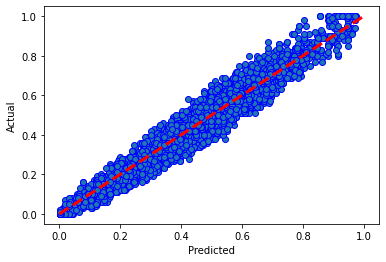

In [26]:
# using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
alg = RandomForestRegressor(n_estimators = 86, random_state = 6)
alg.fit(x, y);

y_predicted = alg.predict(x_test) # trained model
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [28]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set\n--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2)) # got 93.21% of accuracy
# good but not best

The model performance for testing set
--------------------------------------
MAE is 0.0413215951619409
MSE is 0.0026577792237825735
R2 score is 0.9321647026138368


In [29]:
# gonna find out values for test
print("The test data has",test.shape)
print(test.isnull().sum())

The test data has (12250, 8)
Employee_ID             0
Date_of_Joining         0
Gender                  0
Company_Type            0
WFH_Setup_Available     0
Designation             0
Resource_Allocation     0
Mental_Fatigue_Score    0
dtype: int64


In [30]:
id = pd.DataFrame(test.Employee_ID.copy()) # extracting id

test.drop(columns=['Company_Type','Gender','WFH_Setup_Available','Employee_ID','Date_of_Joining'],inplace=True)

for x in test.columns: # encoding
    if test[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(test[x].values))
        test[x] = lbl.transform(list(test[x].values))

In [31]:
Burn_Rate = pd.DataFrame(alg.predict(test))
#applying the model for test dataset to predict Burn_Rate

#merge id and target for submition
output = pd.concat([id, Burn_Rate], axis=1)
output.column = ['Employee ID','Burn Rate']
output

<ipython-input-31-09045212db84>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  output.column = ['Employee ID','Burn Rate']


,Employee_ID,0
0,fffe31003300390039003000,0.603476
1,fffe31003300310037003800,0.365590
2,fffe33003400380035003900,0.425097
3,fffe3100370039003200,0.379048
4,fffe32003600390036003700,0.518630
...,...,...
12245,fffe3900310034003700,0.411642
12246,fffe32003600330034003000,0.440025
12247,fffe31003800340039003000,0.831178
12248,fffe32003600380031003800,0.558373
